# A Cartographers Expedition

Harold wants to have a no-cellphones birthday weekend. This means you have to come up with some way to vet out what locations everyone wants to hit up whie in NYC and plot the routes to each location. Harold wants to usually a regular map, but you have something better: Plotly Express Mapbox map plots! 

Don your cartographers hat and create map plots that will pinpoint the location of the places you'll be visitng. Use this as the map/intinerary for Harold's birthday expedition.

In [4]:
import pandas as pd
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv

### Prep Mapbox API Key

In [5]:
# Read the Mapbox API key
load_dotenv('c:/Users/Sungwon Kim/Fintech/.env')
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

### Prep Data

In [6]:
# Read in data
df = pd.read_csv(Path('../Resources/harold_bday_plans.csv')).dropna()
df

Id  Longitude   Latitude  \
0   90 -73.888958  40.896210   
1   95 -73.871651  40.889879   
2   81 -73.838642  40.886965   
3   69 -73.809802  40.877986   
4    8 -73.878308  40.864424   
5    9 -73.876261  40.855522   
6   78 -73.835304  40.823308   
7   27 -73.832846  40.814343   
8   84 -73.872173  40.815444   
9   21 -73.894229  40.838477   
10  96 -73.875238  40.849006   
11  42 -73.769757  40.851365   
12  79 -73.911758  40.811476   
13  45 -73.926181  40.872193   
14  36 -73.931903  40.862991   
15  74 -73.882762  40.791981   
16  57 -73.942680  40.803460   
17  72 -73.921699  40.795915   
18  91 -73.929974  40.784284   
19  15 -73.965656  40.782882   
20  18 -73.981902  40.768061   
21  88 -73.981794  40.758021   
22  56 -73.988067  40.742181   
23  89 -73.990380  40.735960   
24  39 -74.018389  40.689416   
25  59 -73.951981  40.720900   
26   3 -73.924269  40.776792   
27   7 -73.966125  40.669937   
28  71 -73.969087  40.661251   
29  41 -73.990441  40.652047   
..  ..        ...        ...   
64  66 -73.907912  40.732058   
65  46 -73.871584  40.567882   
66  34 -73.894900  40.561630   
67  53 -74.045282  40.690000   
68  26 -74.040174  40.699195   
69  83 -74.103170  40.642302   
70  82 -74.094603  40.627286   
71  17 -74.110699  40.618110   
72  37 -74.058818  40.604385   
73  60 -74.098830  40.568025   
74  40 -74.125605  40.548445   
75  62 -74.117358  40.582715   
76  52 -74.142504  40.582155   
77  93 -74.158247  40.600620   
78   6 -74.175354  40.531253   
79  94 -74.192429  40.521740   
80  64 -74.218064  40.509665   
81  19 -74.248565  40.499566   
82  85 -74.205037  40.551184   
83  38 -74.194977  40.574057   
84  70 -73.915122  40.583195   
85  48 -73.785999  40.648068   
87  47 -73.826289  40.622877   
88  13 -73.993695  40.585075   
89  43 -74.114920  40.590435   
90  73 -74.005553  40.672047   
91  80 -73.898472  40.764449   
92  75 -73.916829  40.892306   
94  87 -73.865019  40.645828   
95  86 -73.844211  40.646316   

                                                 Name              PlaceType  \
0                                  Van Cortlandt Park                   Park   
1                                   Woodlawn Cemetery               Cemetery   
2                                    Seton Falls Park                   Park   
3                                     Pelham Bay Park                   Park   
4                                    Botanical Garden                 Garden   
5                                          Bronx Park                   Park   
6                           Saint  Raymond's Cemetery               Cemetery   
7                                    Ferry Point Park                   Park   
8                                     Sound View Park                   Park   
9                                        Crotona Park                   Park   
10                          Zoo/Wildlife Conser. Park                   Park   
11                                        Hart Island                 Island   
12                                  Saint Mary's Park                   Park   
13                                   Inwood Hill Park              Hill Park   
14                                    Fort Tryon Park                   Park   
15                                      Rikers Island                 Island   
16                                 Marcus Garvey Park                   Park   
17                              Randall's Island Park                   Park   
18                                 Ward's Island Park                   Park   
19                                       Central Park                   Park   
20                                    Columbus Circle                 Circle   
21                                       Times Square                 Square   
22                                     Madison Square                 Square   
23                                       Union Square                 Square   
24                 

### Total Map View

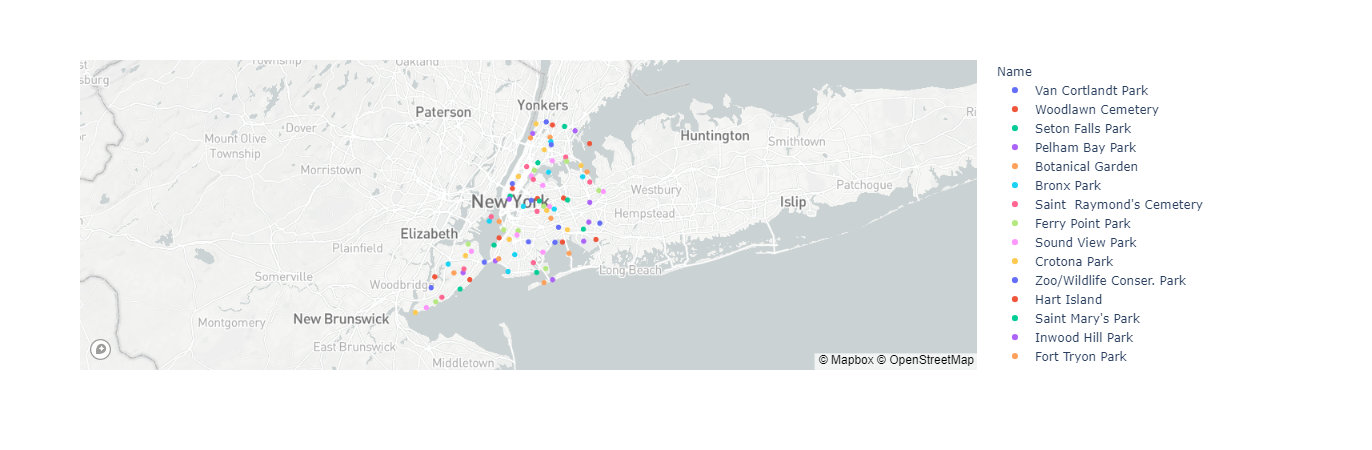

In [33]:
map = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    color="Name"
    
)

# Display the map
map.show()

In [32]:
df.loc[df["PlaceType"] == "Square"]

Id  Longitude   Latitude            Name PlaceType    Borough
21  88 -73.981794  40.758021    Times Square    Square  Manhattan
22  56 -73.988067  40.742181  Madison Square    Square  Manhattan
23  89 -73.990380  40.735960    Union Square    Square  Manhattan

### Route 1

In [23]:
# Plot course for first route
filtered_data_1 = df[df["Name"].str.contains("Airport")]
filtered_data_2 = df.loc[df["Name"] == "Spring Creek Park Gateway National Recreation Area"]
filtered_data = pd.concat([filtered_data_1, filtered_data_2], axis='rows', join="outer")
filtered_data

Id  Longitude   Latitude  \
85  48 -73.785999  40.648068   
95  86 -73.844211  40.646316   

                                                 Name              PlaceType  \
85              John F. Kennedy International Airport  International Airport   
95  Spring Creek Park Gateway National Recreation ...                   Park   

   Borough  
85  Queens  
95  Queens

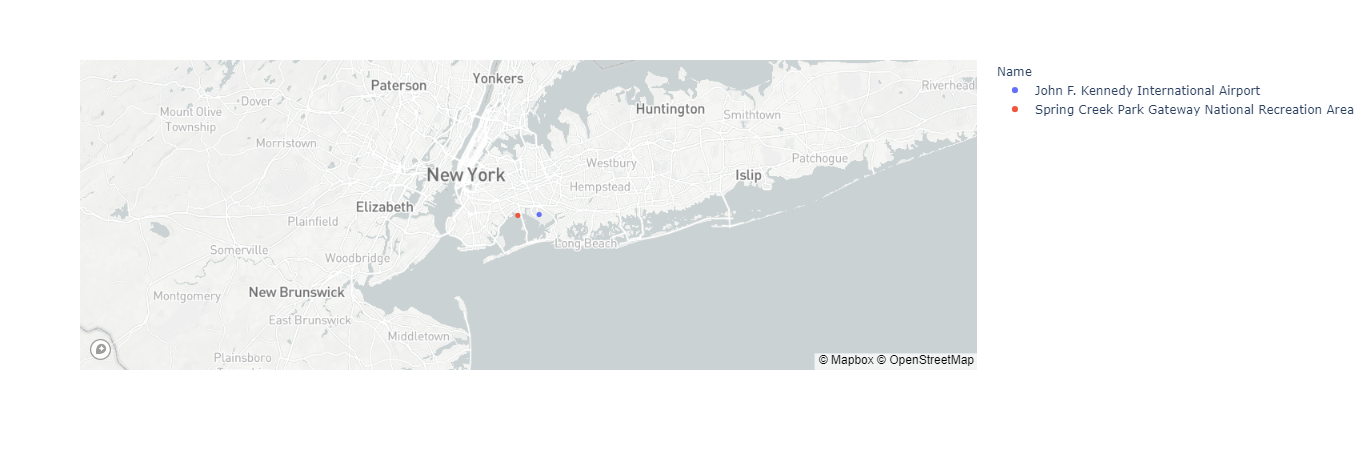

In [24]:
map = px.scatter_mapbox(
    filtered_data,
    lat="Latitude",
    lon="Longitude",
    color="Name"
)

# Display the map
map.show()

### Route 2

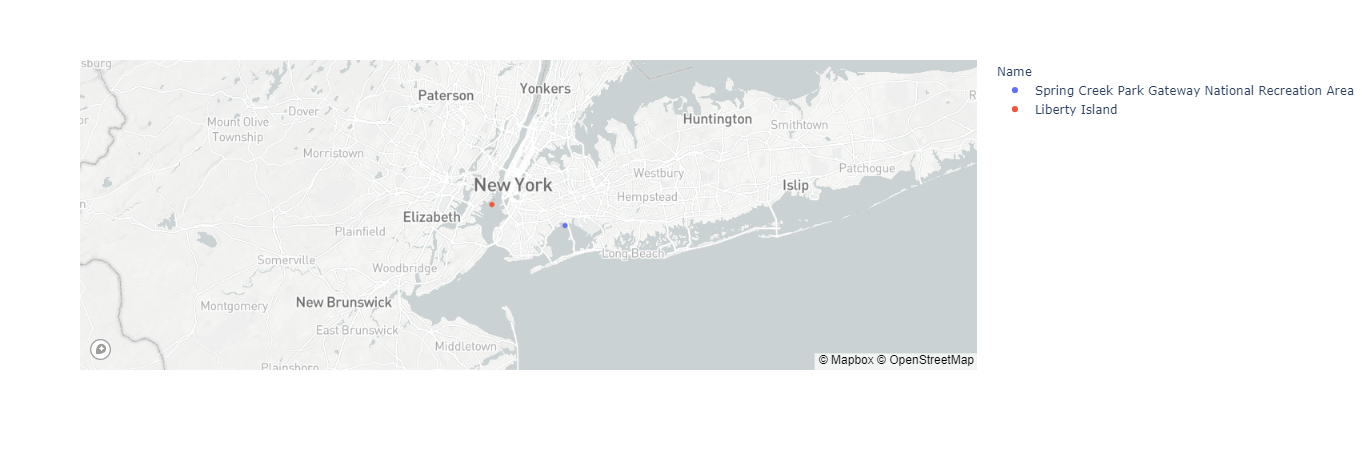

In [31]:
# Plot course for second route
filtered_data_3 = df.loc[df["Id"] == 53]
filtered_data = pd.concat([filtered_data_2, filtered_data_3], axis='rows', join="outer")

map = px.scatter_mapbox(
    filtered_data,
    lat="Latitude",
    lon="Longitude",
    color="Name"
)

# Display the map
map.show()

### Route 3

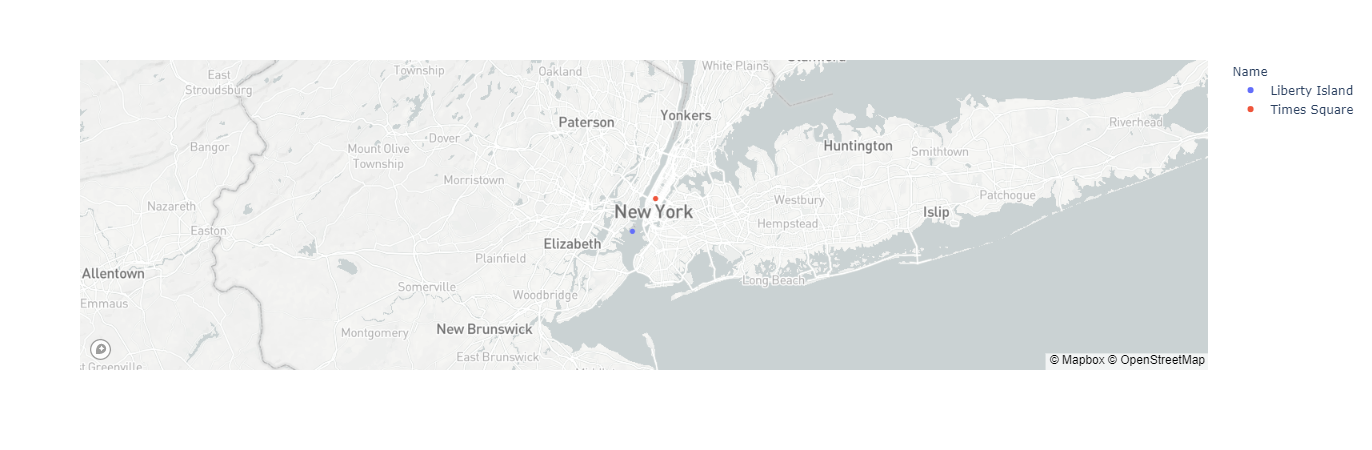

In [34]:
# Plot course for third route
filtered_data_4 = df.loc[df["Id"] == 88]
filtered_data = pd.concat([filtered_data_3, filtered_data_4], axis='rows', join="outer")

map = px.scatter_mapbox(
    filtered_data,
    lat="Latitude",
    lon="Longitude",
    color="Name"
)

# Display the map
map.show()

### All Stops

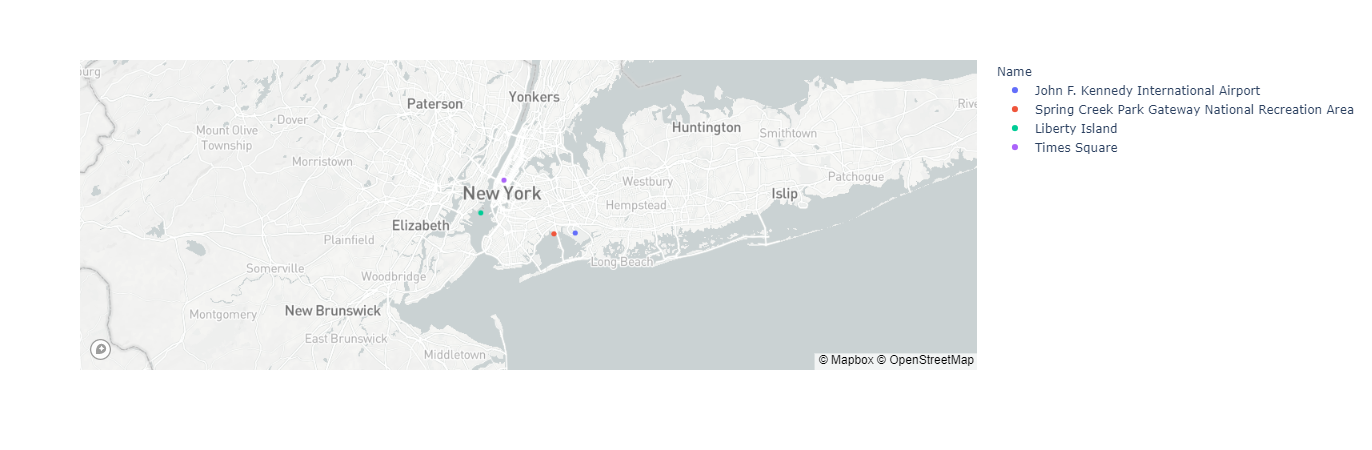

In [36]:
# Plot course for all stops
filtered_data = pd.concat([filtered_data_1, filtered_data_2, filtered_data_3, filtered_data_4], axis='rows', join="outer")

map = px.scatter_mapbox(
    filtered_data,
    lat="Latitude",
    lon="Longitude",
    color="Name"
)

# Display the map
map.show()